#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [79]:
#uploading file
from google.colab import files
upload = files.upload()

Saving imdb_top_10000.txt to imdb_top_10000 (3).txt


In [142]:
import pandas as pd                      
import matplotlib.pyplot as plt
df = pd.read_csv("imdb_top_10000.txt", sep="\t", names=['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'])         #reading file 
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[10000 rows x 7 columns]

In [143]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [144]:
df.isna().sum()         #total number of missing values

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [145]:
df[df.genres.isna() == True]        #locating missing value

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [146]:
df.shape

(10000, 7)

In [147]:
df.dropna(inplace=True)         #dropping missing value
df.shape

(9999, 7)

## 2. Asking Questions

Which movie has the highest score?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [148]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [149]:
#coverting runtime to int
run_time = [int(r.split(' ')[0]) for r in df.runtime]
df['runtime'] = run_time
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [150]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [151]:
genre = df.genres[0]
genre

'Crime|Drama'

In [152]:
genre_set=set()
for genre in df.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)

24

In [153]:
#to add columns
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Reality-TV  Film-Noir  Crime  ...  \
0                       Crime|Drama       False      False   True  ...   
1                    Crime|Thriller       False      False   True  ...   
2            Drama|Mystery|Thriller       False      False  False  ...   
3           Action|Adventure|Sci-Fi       False      False  False  ...   
4  Action|Adventure|Sci-Fi|Thriller       False      False  False  ...   

   Thriller  Comedy  Music  Sci-Fi  Fantasy  Horror  Drama  History  Family  \
0     False   False  False   False    False   False   True    False   False   
1      True   False  False   False    False   False  False    False   False   
2      True   False  False   False    False   False   True    False   False   
3     False   False  False    True    False   False  False    False   False   
4      True   False  False    True    False   False  False    False   False   

   Adult  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 31 columns]

In [154]:
df.drop(["genres"],axis=1, inplace=True)

In [155]:
#removing movie year from title
titles = [title[:-7] for title in df.title]
df['title'] = titles
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

   Reality-TV  Film-Noir  Crime  Romance  ...  Thriller  Comedy  Music  \
0       False      False   True    False  ...     False   False  False   
1       False      False   True    False  ...      True   False  False   
2       False      False  False    False  ...      True   False  False   
3       False      False  False    False  ...     False   False  False   
4       False      False  False    False  ...      True   False  False   

   Sci-Fi  Fantasy  Horror  Drama  History  Family  Adult  
0   False    False   False   True    False   False  False  
1   False    False   False  False    False   False  False  
2   False    False   False   True    False   False  False  
3    True    False   False  False    False   False  False  
4    True    False   False  False    False   False  False  

[5 rows x 30 columns]

## 4. EDA

In [157]:
df.describe()


year        score          votes      runtime
count  9999.000000  9999.000000    9999.000000  9999.000000
mean   1993.471447     6.385989   16605.462946   103.580358
std      14.830049     1.189965   34564.883945    26.629310
min    1950.000000     1.500000    1356.000000     0.000000
25%    1986.000000     5.700000    2334.500000    93.000000
50%    1998.000000     6.600000    4981.000000   102.000000
75%    2005.000000     7.200000   15278.500000   115.000000
max    2011.000000     9.200000  619479.000000   450.000000

Text(0, 0.5, 'Number of movies')

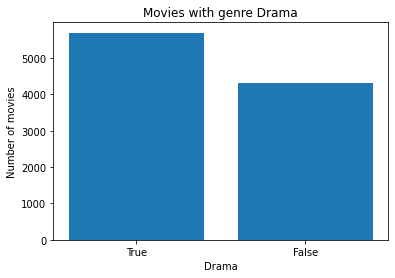

In [158]:
x=['True', 'False']
y=df.Drama.value_counts()
plt.bar(x,y)
plt.title("Movies with genre Drama")
plt.xlabel("Drama")
plt.ylabel("Number of movies")

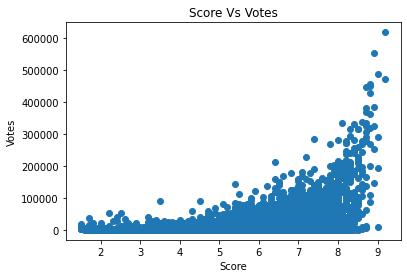

In [159]:
plt.scatter(df.score,df.votes)
plt.title("Score Vs Votes")
plt.xlabel("Score")
plt.ylabel("Votes")
plt.show()

## 5. Determining Best Movies

In [161]:
yeardf = df.groupby('year', sort=False)
yeardf

In [162]:
yeardf.size()

year
1994    235
1999    297
2010    315
2009    417
1993    219
       ... 
1961     43
1951     32
1953     47
1956     46
1955     53
Length: 62, dtype: int64

In [163]:
yeardf.first()

imdbID                     title  score   votes  runtime  Reality-TV  \
year                                                                            
1994  tt0111161  The Shawshank Redemption    9.2  619479      142       False   
1999  tt0137523                Fight Club    8.8  458173      139       False   
2010  tt1375666                 Inception    8.9  385149      148       False   
2009  tt0499549                    Avatar    8.1  336855      162       False   
1993  tt0108052          Schindler's List    8.9  325888      195       False   
...         ...                       ...    ...     ...      ...         ...   
1961  tt0054698    Breakfast at Tiffany's    7.8   42114      115       False   
1951  tt0044079      Strangers on a Train    8.3   40104      101       False   
1953  tt0046250             Roman Holiday    8.1   36760      118       False   
1956  tt0049730             The Searchers    8.1   32502      119       False   
1955  tt0048545     Rebel Without a Cause    7.9   30491      111       False   

      Film-Noir  Crime  Romance  Musical  ...  Thriller  Comedy  Music  \
year                                      ...                            
1994      False   True    False    False  ...     False   False  False   
1999      False  False    False    False  ...      True   False  False   
2010      False  False    False    False  ...      True   False  False   
2009      False  False    False    False  ...     False   False  False   
1993      False  False    False    False  ...     False   False  False   
...         ...    ...      ...      ...  ...       ...     ...    ...   
1961      False  False     True    False  ...     False    True  False   
1951       True   True     True    False  ...      True   False  False   
1953      False  False     True    False  ...     False    True  False   
1956      False  False    False    False  ...     False   False  False   
1955      False  False     True    False  ...     False   False  False   

      Sci-Fi  Fantasy  Horror  Drama  History  Family  Adult  
year                                                          
1994   False    False   False   True    False   False  False  
1999   False    False   False   True    False   False  False  
2010    True    False   False  False    False   False  False  
2009    True     True   False  False    False   False  False  
1993   False    False   False   True     True   False  False  
...      ...      ...     ...    ...      ...     ...    ...  
1961   False    False   False   True    False   False  False  
1951   False    False   False  False    False   False  False  
1953   False    False   False   True    False   False  False  
1956   False    False   False   True    False   False  False  
1955   False    False   False   True    False   False  False  

[62 rows x 29 columns]

In [164]:
yeardf.last()

imdbID                 title  score  votes  runtime  Reality-TV  \
year                                                                       
1994  tt0110064         House Party 3    3.1   1357      100       False   
1999  tt0152836                  Taal    6.5   1356      179       False   
2010  tt1629391        Tere Bin Laden    7.2   1357       95       False   
2009  tt1281374             Don McKay    6.0   1363       87       False   
1993  tt0110222  Kabhi Haan Kabhi Naa    7.6   1374      158       False   
...         ...                   ...    ...    ...      ...         ...   
1961  tt0055320              Il Posto    8.1   1379       93       False   
1951  tt0043643     His Kind of Woman    7.2   1474      120       False   
1953  tt0046000                  Lili    7.2   1376       81       False   
1956  tt0048937   Alexander the Great    5.9   1363      141       False   
1955  tt0048198        I Live in Fear    7.3   1360      103       False   

      Film-Noir  Crime  Romance  Musical  ...  Thriller  Comedy  Music  \
year                                      ...                            
1994      False  False     True    False  ...     False    True   True   
1999      False  False     True     True  ...     False   False  False   
2010      False  False    False    False  ...     False    True  False   
2009      False  False    False    False  ...      True   False  False   
1993      False  False     True    False  ...     False    True   True   
...         ...    ...      ...      ...  ...       ...     ...    ...   
1961      False  False    False    False  ...     False    True  False   
1951       True   True    False    False  ...      True    True  False   
1953      False  False     True     True  ...     False   False  False   
1956      False  False    False    False  ...     False   False  False   
1955      False  False    False    False  ...     False   False  False   

      Sci-Fi  Fantasy  Horror  Drama  History  Family  Adult  
year                                                          
1994   False    False   False  False    False   False  False  
1999   False    False   False  False    False   False  False  
2010   False    False   False   True    False   False  False  
2009   False    False   False   True    False   False  False  
1993   False    False   False   True    False   False  False  
...      ...      ...     ...    ...      ...     ...    ...  
1961   False    False   False   True    False   False  False  
1951   False    False   False  False    False   False  False  
1953   False    False   False   True    False   False  False  
1956   False    False   False   True     True   False  False  
1955   False    False   False   True    False   False  False  

[62 rows x 29 columns]

In [165]:
yeardf.groups

{1994: [0, 1, 5, 21, 74, 248, 267, 310, 326, 345, 348, 388, 400, 477, 564, 730, 845, 910, 1016, 1159, 1296, 1373, 1414, 1456, 1467, 1476, 1480, 1610, 1718, 1724, 1758, 1847, 1876, 1881, 1981, 1986, 1999, 2038, 2071, 2072, 2106, 2117, 2190, 2196, 2225, 2284, 2297, 2355, 2404, 2425, 2446, 2461, 2500, 2531, 2586, 2702, 2744, 2762, 2962, 2966, 2994, 3030, 3110, 3136, 3212, 3226, 3252, 3253, 3311, 3385, 3406, 3440, 3473, 3481, 3487, 3538, 3558, 3592, 3598, 3615, 3684, 3708, 3711, 3762, 3778, 3815, 3817, 3909, 3926, 3970, 3999, 4013, 4042, 4043, 4047, 4051, 4104, 4112, 4199, 4227, ...], 1999: [2, 3, 6, 15, 22, 77, 150, 154, 190, 193, 197, 216, 219, 250, 264, 289, 320, 349, 378, 448, 449, 451, 462, 479, 525, 551, 601, 648, 650, 657, 658, 703, 710, 712, 725, 735, 761, 775, 793, 831, 885, 889, 966, 969, 973, 1010, 1011, 1013, 1047, 1055, 1060, 1063, 1153, 1187, 1202, 1207, 1217, 1252, 1255, 1263, 1272, 1281, 1293, 1336, 1343, 1365, 1432, 1455, 1519, 1564, 1582, 1643, 1647, 1651, 1832, 1844, 186

In [166]:
yeardf.get_group(2010).head()

imdbID           title  year  score   votes  runtime  Reality-TV  \
4    tt1375666       Inception  2010    8.9  385149      148       False   
100  tt1130884  Shutter Island  2010    8.0  171493      138       False   
117  tt0947798      Black Swan  2010    8.3  150346      108       False   
122  tt0435761     Toy Story 3  2010    8.6  144200      103       False   
145  tt1250777        Kick-Ass  2010    8.0  146535      117       False   

     Film-Noir  Crime  Romance  ...  Thriller  Comedy  Music  Sci-Fi  Fantasy  \
4        False  False    False  ...      True   False  False    True    False   
100      False  False    False  ...      True   False  False   False    False   
117      False  False    False  ...      True   False  False   False    False   
122      False  False    False  ...     False    True  False   False     True   
145      False  False    False  ...     False    True  False   False    False   

     Horror  Drama  History  Family  Adult  
4     False  False    False   False  False  
100   False   True    False   False  False  
117   False   True    False   False  False  
122   False  False    False    True  False  
145   False  False    False   False  False  

[5 rows x 30 columns]

In [167]:
yeardf.max()

imdbID                                    title  score   votes  \
year                                                                      
1994  tt0145529  Yrrol - En kolossalt genomt\xe4nkt film    9.2  619479   
1999  tt0289424                                 eXistenZ    8.8  458173   
2010  tt1740707                                   Zero 2    8.9  385149   
2009  tt1569364                                  [Rec] 2    8.4  336855   
1993  tt0115819               Wrestling Ernest Hemingway    8.9  325888   
...         ...                                      ...    ...     ...   
1961  tt0055913                                  Yojimbo    8.4   42114   
1951  tt0044876                      When Worlds Collide    8.3   40104   
1953  tt0047677                                   Ugetsu    8.3   36760   
1956  tt0197521                      Written on the Wind    8.2   32502   
1955  tt0049674                          We're No Angels    8.3   30491   

      runtime  Reality-TV  Film-Noir  Crime  Romance  Musical  ...  Thriller  \
year                                                           ...             
1994      450       False      False   True     True     True  ...      True   
1999      189       False      False   True     True     True  ...      True   
2010      179       False      False   True     True     True  ...      True   
2009      170       False      False   True     True     True  ...      True   
1993      261       False      False   True     True     True  ...      True   
...       ...         ...        ...    ...      ...      ...  ...       ...   
1961      186       False      False   True     True     True  ...      True   
1951      171       False       True   True     True     True  ...      True   
1953      136       False       True   True     True     True  ...      True   
1956      220       False       True   True     True     True  ...      True   
1955      181       False       True   True     True     True  ...      True   

      Comedy  Music  Sci-Fi  Fantasy  Horror  Drama  History  Family  Adult  
year                                                                         
1994    True   True    True     True    True   True     True    True  False  
1999    True   True    True     True    True   True     True    True   True  
2010    True   True    True     True    True   True     True    True   True  
2009    True   True    True     True    True   True     True    True  False  
1993    True   True    True     True    True   True     True    True  False  
...      ...    ...     ...      ...     ...    ...      ...     ...    ...  
1961    True  False    True     True    True   True     True    True  False  
1951    True  False    True     True    True   True     True    True  False  
1953    True   True    True     True    True   True     True    True  False  
1956    True   True    True     True    True   True     True    True  False  
1955    True   True    True     True    True   True     True    True  False  

[62 rows x 29 columns]

In [168]:
yeardf.min()

imdbID                               title  score  votes  runtime  \
year                                                                         
1994  tt0106339                  3 Ninjas Kick Back    2.0   1357        0   
1999  tt0118665          10 Things I Hate About You    2.2   1356        0   
2010  tt0398286                      'Tamara Drewe'    2.2   1357        0   
2009  tt0327597                (500) Days of Summer    1.5   1363        0   
1993  tt0103743                        A Bronx Tale    2.4   1374        0   
...         ...                                 ...    ...    ...      ...   
1961  tt0054130                 A Raisin in the Sun    1.7   1379        0   
1951  tt0042619                   A Christmas Carol    6.2   1474       69   
1953  tt0044953      Abbott and Costello Go to Mars    2.9   1376        0   
1956  tt0047892            ...And God Created Woman    3.1   1363        0   
1955  tt0046889  Abbott and Costello Meet the Mummy    3.7   1360        0   

      Reality-TV  Film-Noir  Crime  Romance  Musical  ...  Thriller  Comedy  \
year                                                  ...                     
1994       False      False  False    False    False  ...     False   False   
1999       False      False  False    False    False  ...     False   False   
2010       False      False  False    False    False  ...     False   False   
2009       False      False  False    False    False  ...     False   False   
1993       False      False  False    False    False  ...     False   False   
...          ...        ...    ...      ...      ...  ...       ...     ...   
1961       False      False  False    False    False  ...     False   False   
1951       False      False  False    False    False  ...     False   False   
1953       False      False  False    False    False  ...     False   False   
1956       False      False  False    False    False  ...     False   False   
1955       False      False  False    False    False  ...     False   False   

      Music  Sci-Fi  Fantasy  Horror  Drama  History  Family  Adult  
year                                                                 
1994  False   False    False   False  False    False   False  False  
1999  False   False    False   False  False    False   False  False  
2010  False   False    False   False  False    False   False  False  
2009  False   False    False   False  False    False   False  False  
1993  False   False    False   False  False    False   False  False  
...     ...     ...      ...     ...    ...      ...     ...    ...  
1961  False   False    False   False  False    False   False  False  
1951  False   False    False   False  False    False   False  False  
1953  False   False    False   False  False    False   False  False  
1956  False   False    False   False  False    False   False  False  
1955  False   False    False   False  False    False   False  False  

[62 rows x 29 columns]

In [169]:
yeardf['score'].mean()

year
1994    6.081277
1999    6.306734
2010    6.340635
2009    6.287290
1993    6.173516
          ...   
1961    7.195349
1951    7.478125
1953    7.106383
1956    7.139130
1955    7.250943
Name: score, Length: 62, dtype: float64

In [170]:
#Determining best movie based on score
best_movie = df.groupby('score', sort = False)

In [171]:
for key,valuedf in best_movie:
    highest_score = valuedf[(valuedf['score'] == valuedf.score.max())]    
    print(highest_score.title, highest_score.year, highest_score.score)
    break

0     The Shawshank Redemption
26               The Godfather
Name: title, dtype: object 0     1994
26    1972
Name: year, dtype: int64 0     9.2
26    9.2
Name: score, dtype: float64


In [172]:
df[df.score == df.score.max()][['title', 'year', 'score']]

title  year  score
0   The Shawshank Redemption  1994    9.2
26             The Godfather  1972    9.2

Above two movies have the highest score.

## 6. Trends in Popularity of Genres

In [173]:
genredf = df[list(genre_set)]
genredf.shape

(9999, 24)

In [174]:
genredf.sum()

Reality-TV       1
Film-Noir       40
Crime         1867
Romance       2441
Musical        260
News             1
War            512
Western        235
Action        1891
Biography      394
Mystery       1009
Sport          288
Adventure     1313
Animation      314
Thriller      2832
Comedy        3922
Music          371
Sci-Fi         897
Fantasy        916
Horror        1215
Drama         5697
History        358
Family         754
Adult            9
dtype: int64

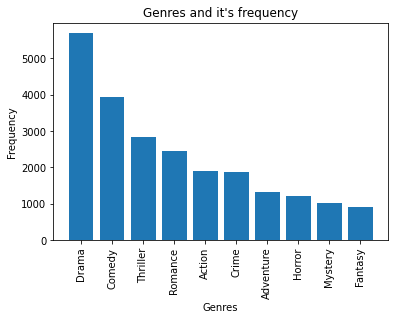

In [175]:
result = genredf.sum()
result = result.sort_values(ascending=False)

x = result.index[:10]
y = result[:10]
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

Drama is the most popular among 24 unique genres.